In [1]:
#s3 is the storage unit to store the data and the model
import sagemaker
import boto3 
from sagemaker.amazon.amazon_estimator import image_uris
from sagemaker.session import s3_input, Session

In [2]:
import urllib
import pandas as pd
try:
    urllib.request.urlretrieve("https://d1.awsstatic.com/tmt/build-train-deploy-machine-learning-model-sagemaker/bank_clean.27f01fbbdf43271788427f3682996ae29ceca05d.csv","bank.csv")
    print('success: downloaded bank.csv')
except Exception as e:
    print('Data loading error: ',e)
    

success: downloaded bank.csv


In [3]:
try:
    model_data=pd.read_csv('./bank.csv',index_col=0)
    print('Success: Data loaded into dataframe')
except Exception as e:
    print('Data load erroer',e)

Success: Data loaded into dataframe


In [4]:
features_names=list(model_data.columns)
features_names

['age',
 'campaign',
 'pdays',
 'previous',
 'no_previous_contact',
 'not_working',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'd

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.963217,0.087623,0.253035,0.224677,0.035350,0.025736,...,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.887346,0.112654
std,10.42125,2.770014,186.910907,0.494901,0.188230,0.282749,0.434756,0.417375,0.184665,0.158348,...,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


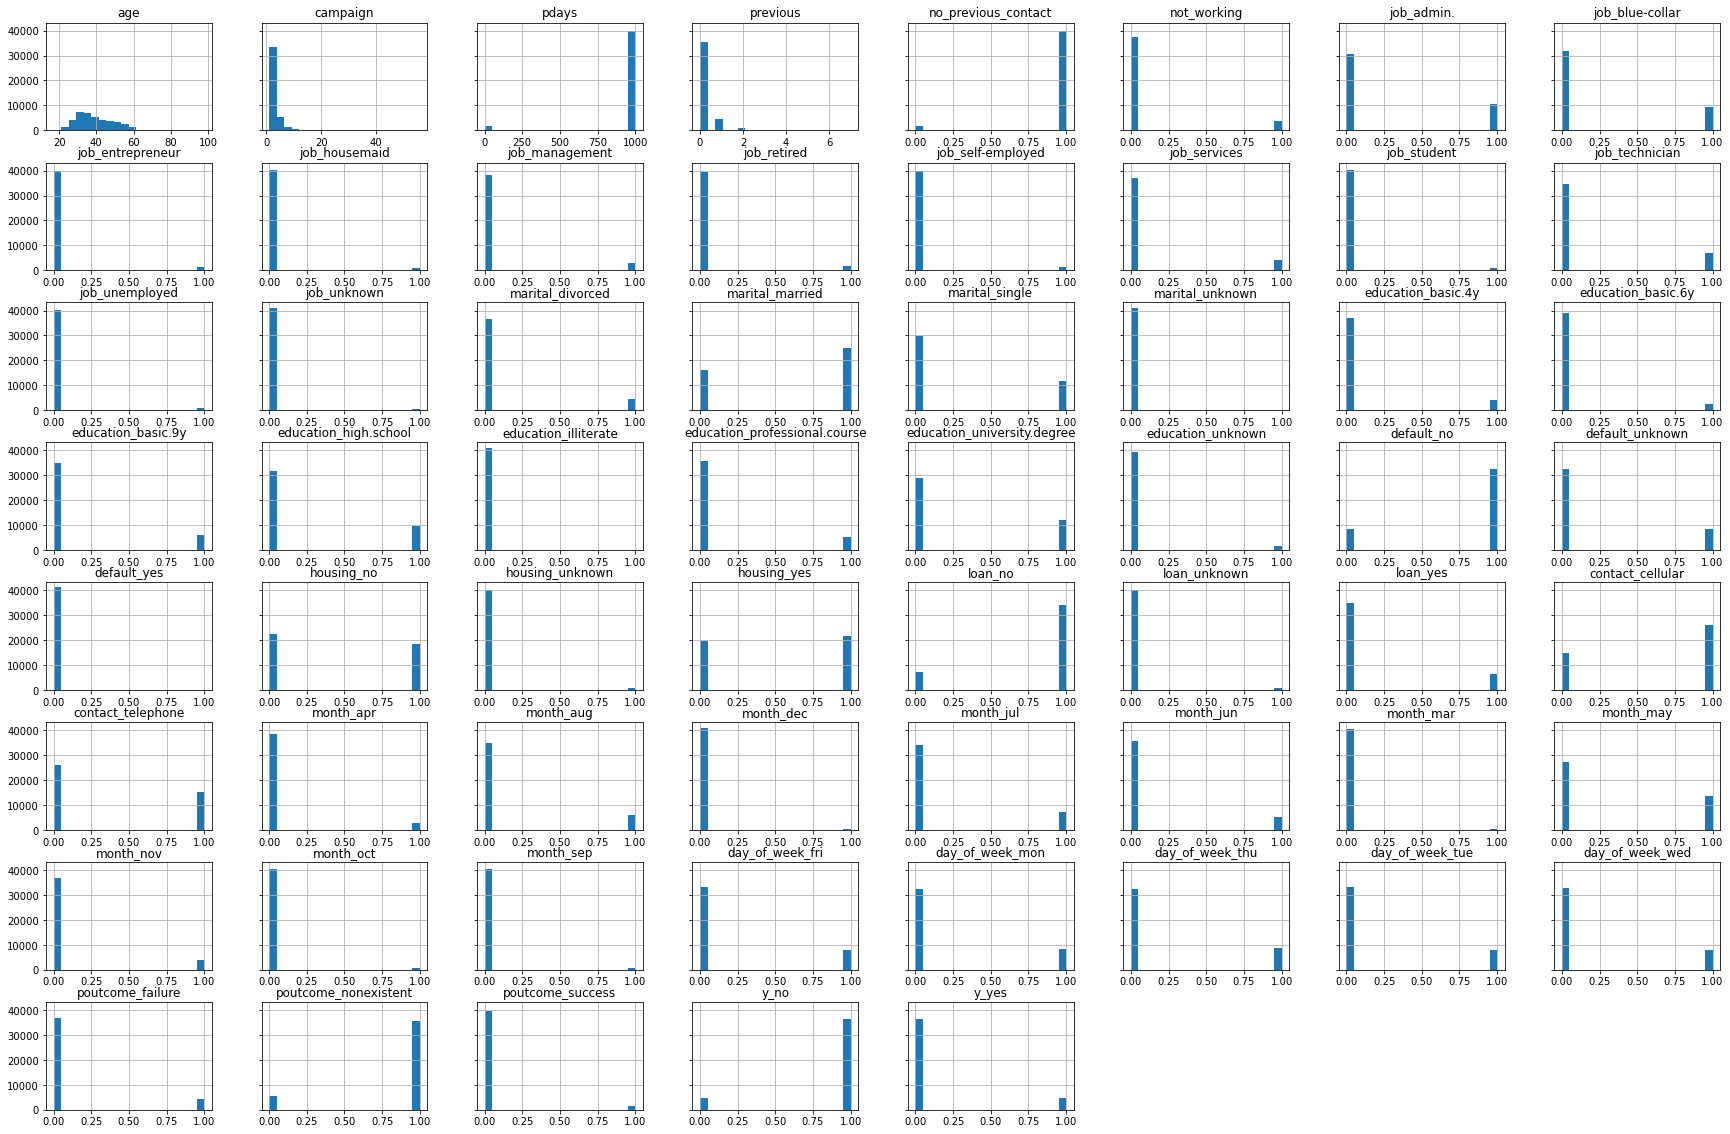

In [5]:
#Exploratory data analysis
display(model_data.describe())
hist=model_data.hist(bins=20,sharey=True,figsize=(30,20))

In [6]:
bucket_name='bankapplication69' #this is unique like instagram ID
my_region=boto3.session.Session().region_name
print(my_region)

us-east-2


In [7]:
s3= boto3.resource('s3')
try:
    if s3.create_bucket(Bucket=bucket_name):
        print('s3 is created successfully')
    print('s3 is created successfully')
except Exception as e:
    print('s3 error: ',e)
    
#I guess the error is because we manually created the s3 bucket in the console and 
#this code will automatically create the s3 bucket 

s3 error:  An error occurred (IllegalLocationConstraintException) when calling the CreateBucket operation: The unspecified location constraint is incompatible for the region specific endpoint this request was sent to.


In [8]:
#setting the output path where the trained model will be saved
prefix = 'xgboost-as-a-built-in-algo'
output_path= 's3://{}/{}/output'.format(bucket_name,prefix)
print(output_path)
#also used for version control

s3://bankapplication69/xgboost-as-a-built-in-algo/output


In [9]:
#splitting the data into train,test datasets 
import numpy as np
#80-20 train-test split
train_data,test_data=np.split(model_data.sample(frac=1,random_state=1729),[int(0.8 * len(model_data))])
print(train_data.shape,test_data.shape)

(32950, 61) (8238, 61)


In [10]:
#moving the dependent variables to the first column and dropping the y_no columns
#since y_no and y_yes pretty much tells the same thing
import os
pd.concat([train_data['y_yes'],train_data.drop(['y_no','y_yes'],axis=1)],axis=1).to_csv('train.csv',index=False,header=False)
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix,'train/train.csv')).upload_file('train.csv')
s3_input_train=sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/train'.format(bucket_name,prefix),content_type='csv')
#sagemaker.session.s3_input has been renamed to sagemaker.inputs.TrainingInput.

In [11]:
pd.concat([test_data['y_yes'], test_data.drop(['y_no', 'y_yes'], axis=1)], axis=1).to_csv('test.csv', index=False, header=False)
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix, 'test/test.csv')).upload_file('test.csv')
s3_input_test = sagemaker.inputs.TrainingInput(s3_data='s3://{}/{}/test'.format(bucket_name, prefix), content_type='csv')
#test and train data has been uploaded to the s3 bucket 'bankapplication69'

In [12]:
test_data

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
28567,52,1,999,2,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
28500,45,2,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
15996,44,20,999,0,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
33414,35,6,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
14122,31,3,999,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23385,29,3,999,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,0
38797,60,2,6,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1267,36,4,999,0,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3174,42,1,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [13]:
train_data

,age,campaign,pdays,previous,no_previous_contact,not_working,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
40949,54,3,999,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
9332,56,2,999,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
32286,32,2,999,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
3925,46,3,999,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
9406,35,2,999,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25429,30,5,999,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
21391,37,1,999,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
34363,34,3,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
18365,37,2,999,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [14]:
container=sagemaker.image_uris.retrieve("xgboost", my_region, "1.2-1")
print(container)
role=sagemaker.get_execution_role()
role

257758044811.dkr.ecr.us-east-2.amazonaws.com/sagemaker-xgboost:1.2-1


'arn:aws:iam::437023692778:role/service-role/AmazonSageMaker-ExecutionRole-20210914T153599'

In [33]:
from sagemaker.debugger import Rule, rule_configs

model=sagemaker.estimator.Estimator(
image_uri=container, #model pulled
    role=role,
    instance_count=1,
    instance_type='ml.p2.xlarge',
    volume_size=5, #5GB
    output_path=output_path,#model is saved here
    sagemaker_session=sagemaker.Session(),
    #use_spot_instances=True,
    #max_run=300,
    #max_wait=600, #to reduce the billing seconds 
    rules=[Rule.sagemaker(rule_configs.create_xgboost_report())]
)

In [34]:
model.set_hyperparameters(

    max_depth=5,
    eta=0.2,
    gamma=4,
    min_child_weight=6,
    subsample=0.7,
    objective="binary:logistic",
    num_round=1000
) #hyperparameter tuning should be done locally to reduce the cost

In [35]:
from sagemaker.session import TrainingInput
model.fit({"train":s3_input_train,"validation":s3_input_test},wait=True)

2021-10-01 13:19:41 Starting - Starting the training job...
2021-10-01 13:20:05 Starting - Launching requested ML instancesCreateXgboostReport: InProgress
ProfilerReport-1633094381: InProgress
......
2021-10-01 13:21:06 Starting - Preparing the instances for training............
2021-10-01 13:23:08 Downloading - Downloading input data
2021-10-01 13:23:08 Training - Downloading the training image......
2021-10-01 13:24:11 Training - Training image download completed. Training in progress..[2021-10-01 13:24:14.306 ip-10-0-225-230.us-east-2.compute.internal:1 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV i

In [40]:
#Deloying the machine learning model 
xgb_predictor= model.deploy(initial_instance_count=1,instance_type='ml.m4.xlarge') 
#prediction after the deploy

------!

In [51]:
#from sagemaker.predictor import csv_serializer
from sagemaker.serializers import CSVSerializer


test_data_array = test_data.drop(['y_no', 'y_yes'], axis=1).values #load the data into an array
#xgb_predictor.content_type = 'text/csv' # set the data type for an inference
xgb_predictor.serializer = CSVSerializer() # set the serializer type
predictions = xgb_predictor.predict(test_data_array).decode('utf-8') # predict!
predictions_array = np.fromstring(predictions[1:], sep=',') # and turn the prediction into an array
print(predictions_array.shape)

(8238,)


In [52]:
predictions_array #output of all the test data

array([0.25118029, 0.03722503, 0.00584282, ..., 0.02616253, 0.02158483,
       0.04048737])

In [53]:
#taken from the aws documentation
cm = pd.crosstab(index=test_data['y_yes'], columns=np.round(predictions_array), rownames=['Observed'], colnames=['Predicted'])
tn = cm.iloc[0,0]; fn = cm.iloc[1,0]; tp = cm.iloc[1,1]; fp = cm.iloc[0,1]; p = (tp+tn)/(tp+tn+fp+fn)*100
print("\n{0:<20}{1:<4.1f}%\n".format("Overall Classification Rate: ", p))
print("{0:<15}{1:<15}{2:>8}".format("Predicted", "No Purchase", "Purchase"))
print("Observed")
print("{0:<15}{1:<2.0f}% ({2:<}){3:>6.0f}% ({4:<})".format("No Purchase", tn/(tn+fn)*100,tn, fp/(tp+fp)*100, fp))
print("{0:<16}{1:<1.0f}% ({2:<}){3:>7.0f}% ({4:<}) \n".format("Purchase", fn/(tn+fn)*100,fn, tp/(tp+fp)*100, tp))


Overall Classification Rate: 88.9%

Predicted      No Purchase    Purchase
Observed
No Purchase    90% (7104)    43% (166)
Purchase        10% (752)     57% (216) 



In [ ]:
#poor classification accuracy on purchase-no purchase is because of the imbalanced datasets
#Deleting the end points - inlcudes deleting the s3 bucket and the model created
sagemaker.Session().delete_endpoint(xgb_predictor.endpoint)
bucket_to_delete=bot3.resource('s3').Bucket(bucket_name)
bucket_to_delete.objects.all().delete